## **Libraries and Environment Setup**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Generation and Dataset Overview**

In [26]:
np.random.seed(42)

data = {
    "Customer_ID": range(1001, 1031),
    "Age": np.random.randint(21, 65, 30),
    "Account_Type": np.random.choice(["Savings", "Current"], 30),
    "Monthly_Income": np.random.randint(5000, 50000, 30),
    "Monthly_Spend": np.random.randint(2000, 40000, 30),
    "Credit_Score": np.random.randint(450, 800, 30)
}

df = pd.DataFrame(data)
df.head(10)

,Customer_ID,Age,Account_Type,Monthly_Income,Monthly_Spend,Credit_Score
0,1001,59,Savings,13433,31127,511
1,1002,49,Savings,48001,27851,665
2,1003,35,Current,16016,3016,742
3,1004,63,Current,28897,26253,548
4,1005,28,Current,7612,26276,621
5,1006,41,Current,28483,25247,663
6,1007,59,Current,22159,26300,484
7,1008,39,Savings,49974,10529,676
8,1009,43,Current,45994,19262,550
9,1010,31,Current,19541,11268,580


## **Data Structure**

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     30 non-null     int64 
 1   Age             30 non-null     int64 
 2   Account_Type    30 non-null     object
 3   Monthly_Income  30 non-null     int64 
 4   Monthly_Spend   30 non-null     int64 
 5   Credit_Score    30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


## **Descriptive Statistics**

In [4]:
df.describe()


,Customer_ID,Age,Monthly_Income,Monthly_Spend,Credit_Score
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1015.500000,44.366667,25527.733333,18955.066667,617.133333
std,8.803408,12.642248,14583.124262,10150.384735,91.862616
min,1001.000000,22.000000,5161.000000,3016.000000,454.000000
25%,1008.250000,36.000000,13747.750000,10539.500000,545.750000
50%,1015.500000,44.000000,23308.000000,21252.500000,642.000000
75%,1022.750000,55.250000,38473.750000,26270.250000,680.000000
max,1030.000000,64.000000,49974.000000,37222.000000,795.000000


## **Dataset Size and Sample Inspection**

In [28]:
df.shape

(30, 6)

In [29]:
extracted = df.iloc[[4,6,9,11]]
print(extracted)

    Customer_ID  Age Account_Type  Monthly_Income  Monthly_Spend  Credit_Score
4          1005   28      Current            7612          26276           621
6          1007   59      Current           22159          26300           484
9          1010   31      Current           19541          11268           580
11         1012   44      Current           31531          14185           454


## **Customer Demographics Analysis**

In [30]:
df.loc[df["Age"] >= 40, :]

,Customer_ID,Age,Account_Type,Monthly_Income,Monthly_Spend,Credit_Score
0,1001,59,Savings,13433,31127,511
1,1002,49,Savings,48001,27851,665
3,1004,63,Current,28897,26253,548
5,1006,41,Current,28483,25247,663
6,1007,59,Current,22159,26300,484
8,1009,43,Current,45994,19262,550
11,1012,44,Current,31531,14185,454
12,1013,56,Savings,6585,23243,667
13,1014,60,Current,8943,10571,704
14,1015,44,Savings,28939,4568,732


In [31]:

(df["Age"] >= 40).sum()

np.int64(21)

## **Account Type Comparison (group by Account Type)**

In [32]:
customers_behaver = df.groupby("Account_Type").agg({
    "Monthly_Income": ["mean","min","max"],
    "Monthly_Spend": ["mean","min","max"],
    "Credit_Score": ["mean","min","max"],
    "Account_Type": "count"
})
print(customers_behaver)

             Monthly_Income              Monthly_Spend               \
                       mean   min    max          mean   min    max   
Account_Type                                                          
Current        24494.400000  6021  45994  18456.533333  3016  37222   
Savings        26561.066667  5161  49974  19453.600000  4568  35159   

             Credit_Score           Account_Type  
                     mean  min  max        count  
Account_Type                                      
Current        601.933333  454  742           15  
Savings        632.333333  491  795           15  


## **Income vs Monthly Spending**

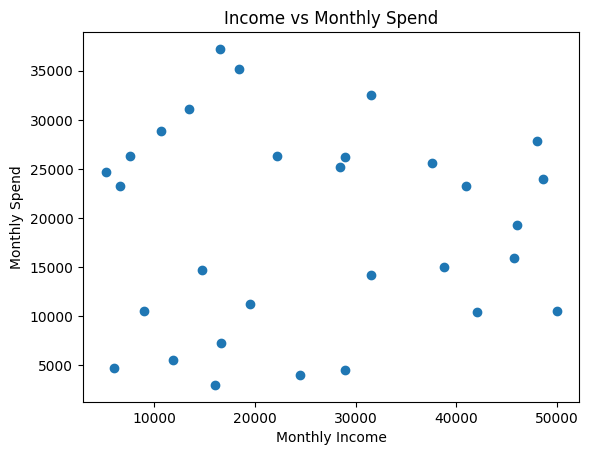

In [33]:
plt.scatter(df["Monthly_Income"], df["Monthly_Spend"])
plt.xlabel("Monthly Income")
plt.ylabel("Monthly Spend")
plt.title("Income vs Monthly Spend")
plt.show()

## **Credit Score and Spending Behaviour**

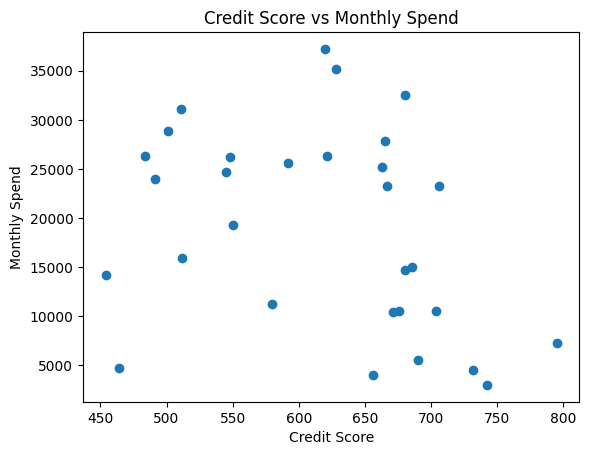

In [25]:
plt.scatter(df["Credit_Score"], df["Monthly_Spend"])
plt.xlabel("Credit Score")
plt.ylabel("Monthly Spend")
plt.title("Credit Score vs Monthly Spend")
plt.show()
